<a href="https://colab.research.google.com/github/eldercamposds/DoencaCardiaca/blob/Testes/Previs%C3%A3o_doen%C3%A7a_cardiaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORAÇÃO, ANÁLISE E TRATAMENTO DOS DADOS: PROJETO PREVISÃO DE DOENÇA CARDÍACA**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais de referência.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Banco de dados/heart.csv')

#Exploração

In [3]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
dados.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
dados.shape

(918, 12)

##Análise de atributos

###Age = idade

In [6]:
dados['Age'].describe()

,Age
count,918.000000
mean,53.510893
std,9.432617
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


In [7]:
dados['Age'].value_counts()

,count
Age,
54,51
58,42
55,41
56,38
57,38
52,36
51,35
59,35
62,35


In [8]:
import plotly.express as px

In [9]:
hist1 = px.histogram(dados, x='Age', nbins=60 )
hist1.update_layout(width=800, height=500, title_text = "Distribuição de Idades")
hist1.show()

### Sex=sexo

In [10]:
dados['Sex'].value_counts()

,count
Sex,
M,725
F,193


In [11]:
dados['Sex'].describe()

,Sex
count,918
unique,2
top,M
freq,725


In [12]:
import seaborn as sns

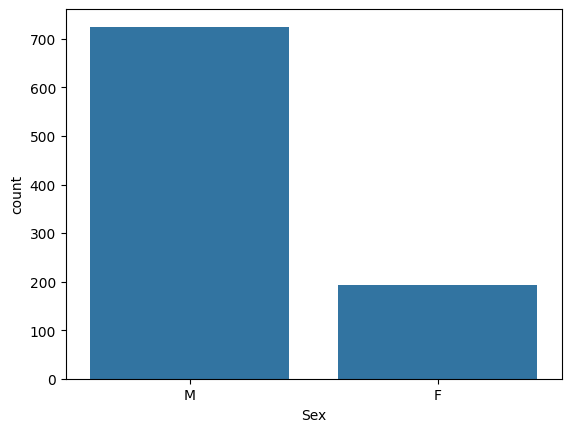

In [13]:
sns.countplot(x='Sex', data=dados);

### ChestPainType = Tipo de dor no peito

In [14]:
dados["ChestPainType"].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


* ASY: assintomático
* NAP: dor não aginosa
* ATA: angina atípica
* TA: angina típica

Angina: Dor no peito causada pela diminuição do fluxo de sangue no coração

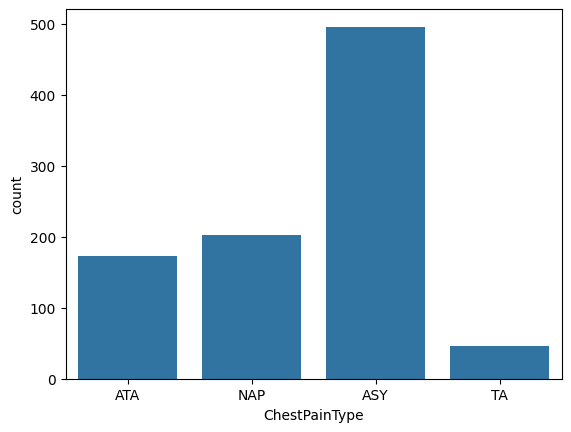

In [15]:
sns.countplot(x='ChestPainType', data=dados);

###RestingBP (blood pressure) = pressão sanguínea em repouso mmHg(sistólica)

In [16]:
dados.RestingBP.value_counts()

,count
RestingBP,
120,132
130,118
140,107
110,58
150,55
...,...
185,1
98,1
92,1


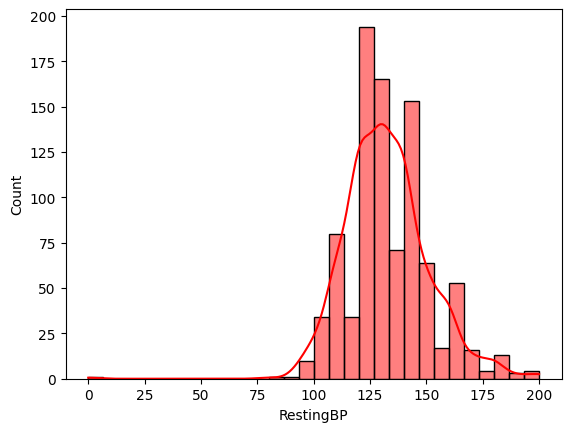

In [17]:
sns.histplot(dados, x='RestingBP', bins=30, color='red', kde=True, stat='count');

### Cholesterol = colesterol sérico (mg/dl)

In [18]:
dados.Cholesterol.value_counts()

,count
Cholesterol,
0,172
254,11
223,10
220,10
230,9
...,...
392,1
316,1
153,1


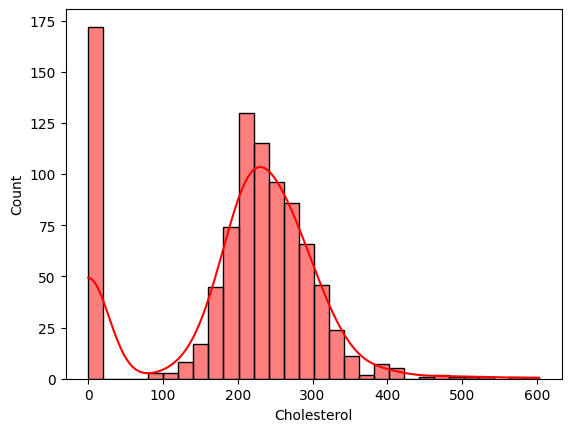

In [19]:
sns.histplot(dados, x='Cholesterol', bins=30, color='red', kde=True, stat='count');

### Fasting BS (blood sugar) = açúcar no sangue em jejum (mg/dl)

In [20]:
dados.FastingBS.value_counts()

,count
FastingBS,
0,704
1,214


* 0: FastingBS < 120 mg/dl (não diabético)
* 1: FastingBS >= 120 mg/dl (diabético)

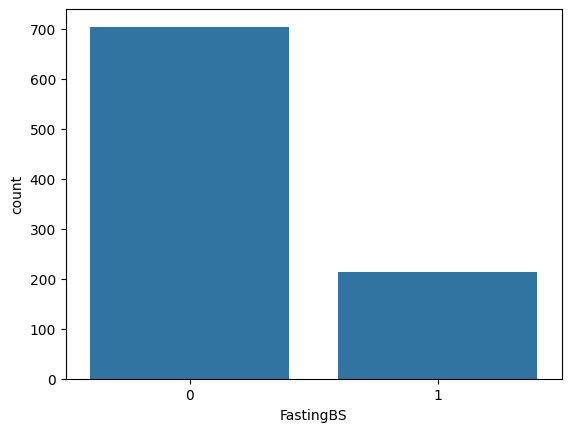

In [21]:
sns.countplot(x='FastingBS', data=dados);

### RestingECG = eletrocardiograma em repouso

In [22]:
dados.RestingECG.value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


* Normal: Normal
* LVH: HIpertrofia ventricular esquerda
* ST: Anormalidade da onda ST-T

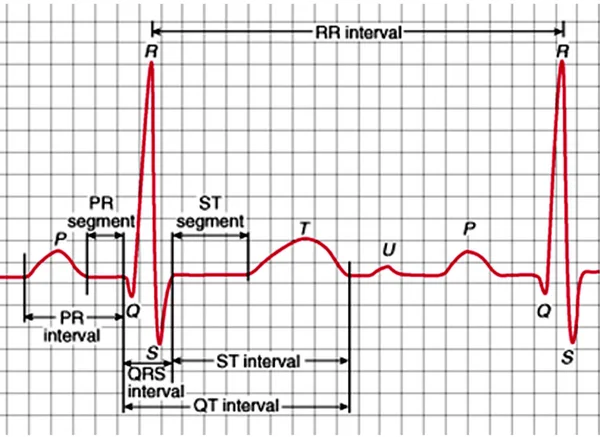

**SEGMENTO ST:** Qualquer desnível do segmento ST, para cima(supradesnícel) ou para baixo (infradesnível), deve ser avaliado pois pode corresponder a um infarto agudo do miocárdio.

<Axes: xlabel='RestingECG', ylabel='count'>

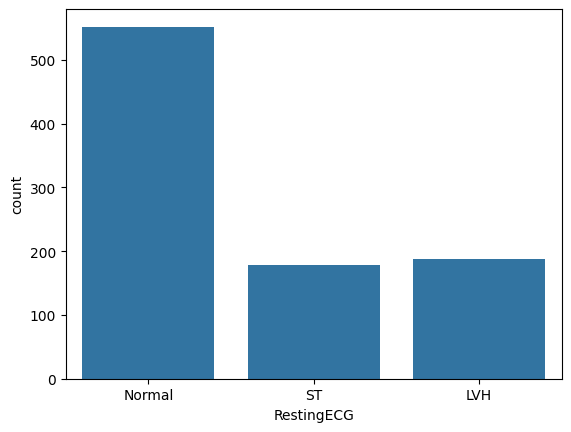

In [23]:
sns.countplot(data=dados, x="RestingECG")

### MarHR (heart rate) = frequência cardíaca máxima

In [24]:
dados.MaxHR.value_counts()

,count
MaxHR,
150,43
140,41
120,36
130,33
160,25
...,...
63,1
83,1
60,1


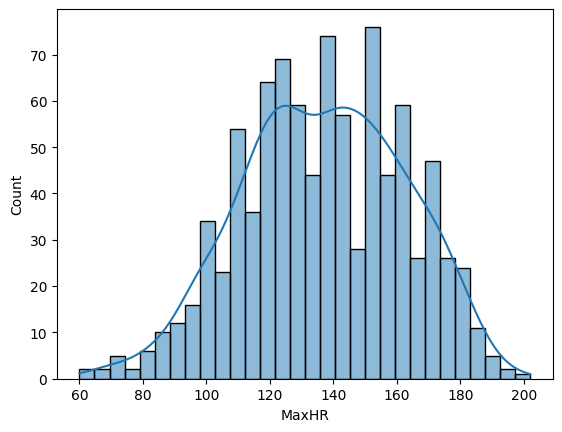

In [25]:
sns.histplot(data=dados, x="MaxHR", bins=30, kde=True, stat='count');

### ExerciseAngina = Angina induzida por *exercício*

In [26]:
dados.ExerciseAngina.value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [27]:
px.pie(dados, "ExerciseAngina")

### OldPeak = Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso

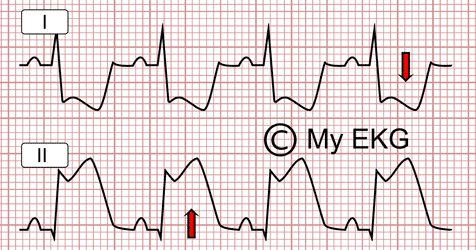

In [28]:
dados.Oldpeak.value_counts()

,count
Oldpeak,
0.0,368
1.0,86
2.0,76
1.5,53
3.0,28
1.2,26
0.2,22
0.5,19
1.4,18


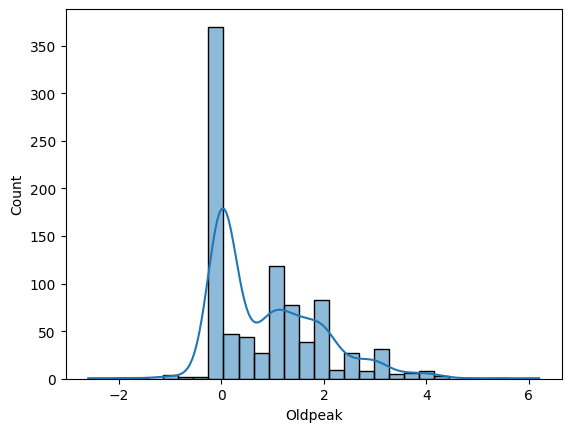

In [29]:
sns.histplot(data=dados, x="Oldpeak", bins=30, kde=True, stat='count');

### ST_Slope = Inclinação do segmento ST no ECG

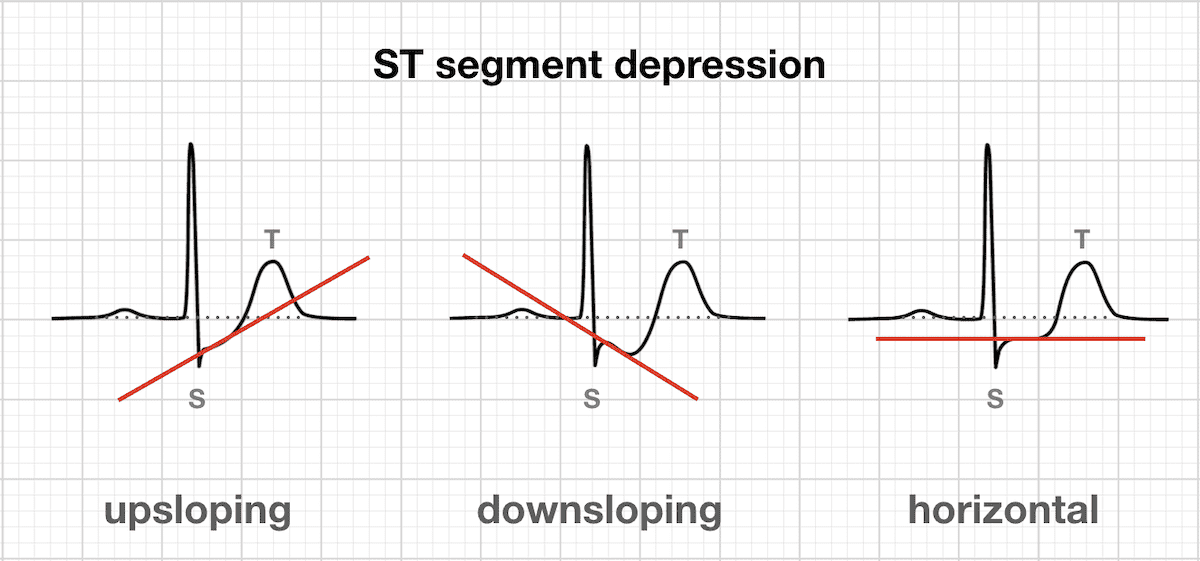

In [30]:
dados.ST_Slope.value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [31]:
px.pie(dados, "ST_Slope")

### HeartDisease = Doença cardíaca

In [32]:
dados.HeartDisease.value_counts()

,count
HeartDisease,
1,508
0,410


* 0: Não possui doença cardíaca
* 1: Possui doença cardíaca

In [33]:
px.pie(dados, "HeartDisease")

## Análise dos tipos dos atribustos

In [34]:
dados.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


## Valores Missing (NAN)

In [35]:
# quantidade de valores faltantes
dados.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


##Análise Descritiva

In [36]:
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [37]:
dados.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


#Tratando Valores

## Excluindo registro com pressão zero

In [38]:
dados2 = dados.loc[dados["RestingBP"] != 0]

In [39]:
dados2.shape

(917, 12)

In [40]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##Subistituindo valores zeros do Colesterol pela mádia

In [41]:
dados2.Cholesterol.value_counts()

,count
Cholesterol,
0,171
254,11
223,10
220,10
230,9
...,...
392,1
316,1
153,1


In [42]:
dados2.Cholesterol.mean()

199.0163576881134

In [45]:
# transformando valores 0 em NAN para calculo da média sem o peso dos valorees 0
dados2.Cholesterol.replace(0, np.NAN, inplace=True)

<ipython-input-45-9374fbf73d28>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
dados2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,171
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [48]:
dados2.Cholesterol.mean()

244.6353887399464

In [49]:
#subistituir valores missing pela média
dados2.Cholesterol.fillna(dados2.Cholesterol.mean(), inplace=True)

<ipython-input-49-945046983ea1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
dados2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [52]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [53]:
dados2.Cholesterol.mode()

,Cholesterol
0,244.635389


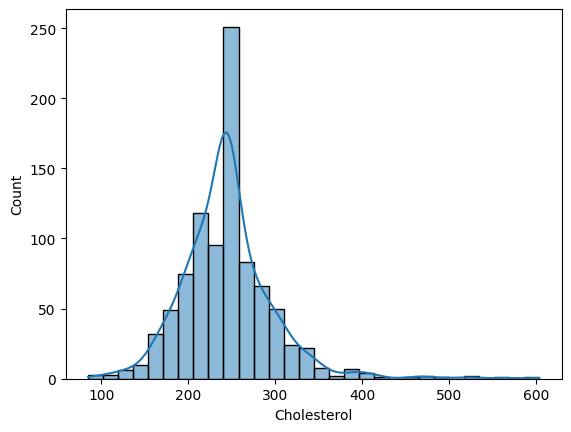

In [55]:
sns.histplot(dados2, x='Cholesterol', kde=True, bins=30);

#Análise de Outlers

In [56]:
#idade
px.box(dados2, y='Age')

In [57]:
#Pressão Sanguínea em Repouso
px.box(dados2, y='RestingBP')

In [58]:
#Colesterol
px.box(dados2, y='Cholesterol')

In [59]:
#Frequência Cardáca Máxima
px.box(dados2, y='MaxHR')

#Salando Dataframe tratado

In [62]:
dados2.to_csv('/content/drive/MyDrive/Banco de dados/heart_tratato.csv', sep=",", encoding="utf-8", index=False)